## Setup

In [31]:
from fastai.vision import *

In [19]:
folder = 'corn'
file = 'corn.csv'

In [11]:
folder = 'flour'
file = 'flour.csv'

In [20]:
path = Path('data/tortillas')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [15]:
path.ls()

[PosixPath('data/tortillas/flour'),
 PosixPath('data/tortillas/flour.csv'),
 PosixPath('data/tortillas/corn.csv'),
 PosixPath('data/tortillas/corn')]

In [29]:
classes = ['flour', 'corn']

## Download and Verify Images

In [24]:
download_images(path/file, dest, max_pics=200)

Process ForkProcess-22:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anacond

KeyboardInterrupt: 

In [25]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## Image Analysis

In [32]:
np.random.seed(50)

In [37]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

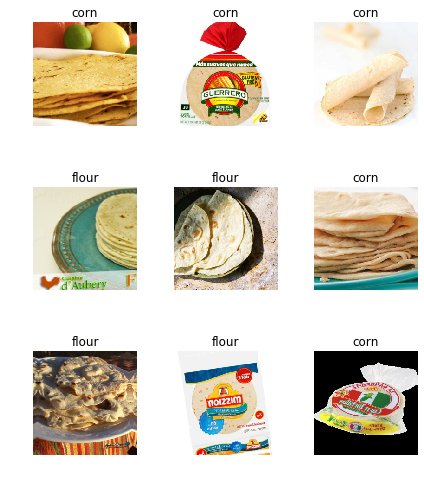

In [45]:
data.show_batch(rows=3, figsize=(6,7))

In [47]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['corn', 'flour'], 2, 302, 75)

In [49]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [52]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.310100,0.614870,0.320000,00:03
1,0.339422,0.622043,0.293333,00:03
2,0.316803,0.639829,0.306667,00:03
3,0.300911,0.643575,0.306667,00:03


In [55]:
learn.save('stage-1')

In [59]:
learn.unfreeze()

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


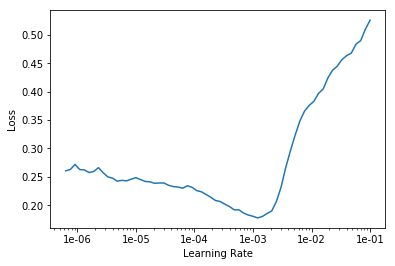

In [61]:
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.195766,1.070344,0.293333,00:03
1,0.189386,1.005625,0.253333,00:03


In [65]:
learn.save('stage-2')

In [66]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (302 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
flour,flour,flour,flour,flour
Path: data/tortillas;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
flour,corn,corn,flour,corn
Path: data/tortillas;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [67]:
interp = ClassificationInterpretation.from_learner(learn)

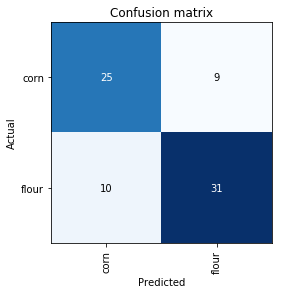

In [68]:
interp.plot_confusion_matrix()

65 misclassified samples over 75 samples in the validation set.


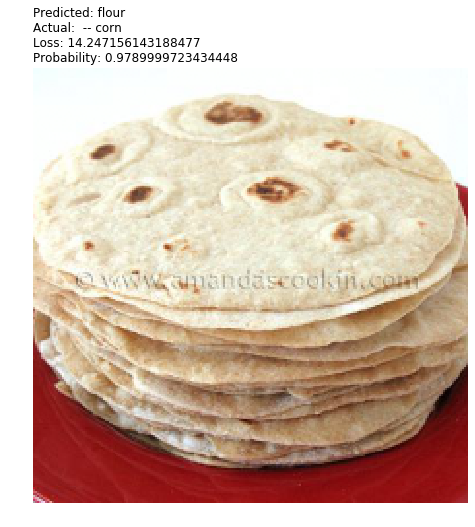

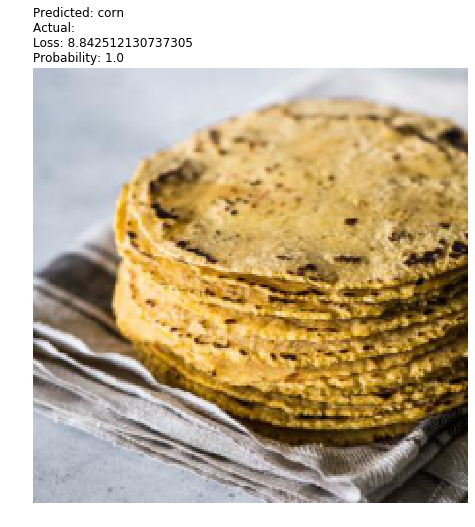

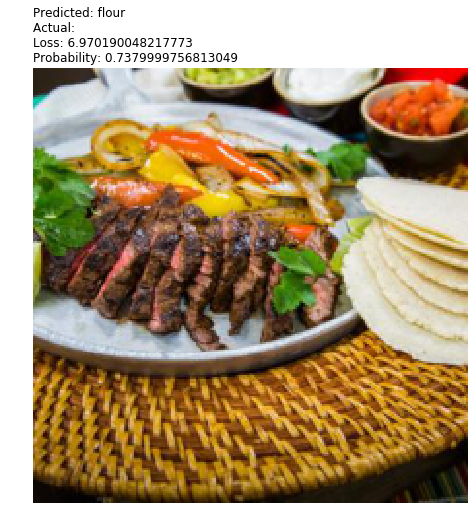

In [69]:
interp.plot_multi_top_losses()

## Cleaning

In [79]:
from fastai.widgets import *

In [80]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [81]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (377 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
flour,flour,flour,flour,flour
Path: data/tortillas;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/tortillas;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [84]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [93]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [94]:
learn.export()

In [96]:
defaults.device = torch.device('cuda')

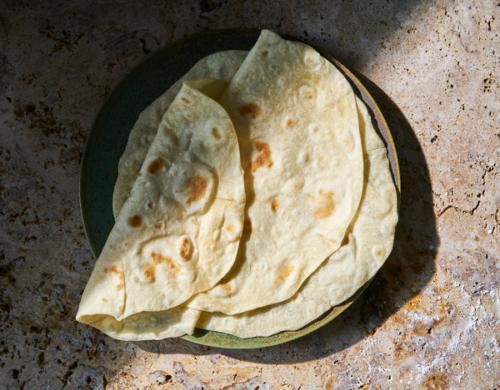

In [103]:
img = open_image(path/'flour'/'00000010.jpg')
img

In [100]:
learn = load_learner(path)

In [104]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category flour